In [23]:
from glob import glob
from tqdm import tqdm
import csv

In [26]:
#get validation and checkpoint from log file

outputs_paths = glob('C:\\Users\\tkachenko\\Desktop\\HSI\\results\\jobs_outputs\\*.log')
outputs_paths = sorted(outputs_paths)
paths = []
checkpoints = []
valids = []

with open('valid_checkpoints.csv', 'w', newline='') as csvfile:
    fieldnames = ['path', 
                  'checkpoint', 
                  'valid']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
    writer.writerow({'path': "Patient",
                     'checkpoint': "Checkpoint",
                     'valid': 'Excepted valid patients'})
    

    for path in tqdm(outputs_paths):
        with open(path, 'r', encoding='utf8') as file:
            data = file.read().replace('\n', '')

        splits = data.split('We except VALID ')
        valid_excepted = splits[1:-1] + [splits[-1].split('--------')[0]]
        print(valid_excepted)

        ch = int(data.split('Restoring model weights from the end of the best epoch.')[-1].split('Epoch ')[1].split(':')[0])


        writer.writerow({'path': path.split('\\')[-1].split('.')[0].split('step_')[-1].split('__')[0],
                         'checkpoint': str(ch),
                         'valid': str(valid_excepted)})


 52%|████████████████████████████████████████████████████████████▌                                                        | 29/56 [00:00<00:00, 281.79it/s]

['2020_06_10_16_35_27_', '2019_07_15_11_33_28_', '2020_05_13_19_30_26_', '2019_09_04_12_43_40_', '2020_04_08_18_05_56_', '2019_08_23_12_15_26_', '2019_09_25_19_44_52_', '2019_10_24_15_53_04_', '2020_06_24_18_00_12_', '2020_03_18_16_40_53_']
['2019_08_23_12_15_26_', '2019_07_17_15_38_14_', '2020_05_13_19_30_26_', '2020_05_07_12_52_25_', '2020_04_08_18_05_56_', '2020_06_23_19_23_37_', '2020_03_27_16_57_07_', '2020_03_27_11_31_09_', '2019_10_28_16_03_29_', '2020_06_24_18_00_12_']
['2020_01_06_11_52_11_', '2020_03_27_11_31_09_', '2019_07_25_11_56_38_', '2020_02_13_18_05_51_', '2019_08_23_12_15_26_', '2020_06_24_18_00_12_', '2020_05_07_12_52_25_', '2020_02_19_13_03_01_', '2019_12_11_11_41_04_', '2020_03_18_16_40_53_']
['2020_05_20_12_06_41_', '2020_06_23_15_23_26_', '2019_09_30_20_50_43_', '2020_06_23_19_23_37_', '2020_05_28_15_20_27_', '2019_08_09_12_17_55_', '2020_05_07_12_52_25_', '2020_01_29_18_12_15_', '2019_07_15_11_33_28_', '2019_09_25_19_44_52_']
['2020_05_15_12_43_58_', '2020_02_04

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 56/56 [00:00<00:00, 279.77it/s]

['2020_04_08_18_05_56_', '2020_03_18_16_40_53_', '2019_08_09_12_17_55_', '2020_03_27_16_57_07_', '2020_02_13_18_05_51_', '2020_01_29_18_12_15_', '2020_05_13_19_31_15_', '2020_03_11_17_14_41_', '2020_04_01_14_23_24_', '2019_09_25_19_44_52_']
['2019_10_25_11_19_55_', '2020_03_27_11_31_09_', '2019_10_30_14_30_27_', '2020_04_01_14_23_24_', '2019_08_28_14_00_34_', '2020_03_18_16_40_53_', '2019_08_12_10_52_33_', '2020_03_20_15_36_36_', '2020_01_29_18_12_15_', '2020_06_03_13_33_43_']
['2020_06_03_13_33_43_', '2019_09_25_19_44_52_', '2019_10_25_16_55_01_', '2020_06_23_19_23_37_', '2019_09_09_17_01_38_', '2020_02_19_13_03_01_', '2020_05_28_15_20_27_', '2019_07_25_11_56_38_', '2020_06_24_18_00_12_', '2020_01_06_11_52_11_']
['2019_10_28_16_03_29_', '2020_06_03_13_33_43_', '2019_12_20_15_15_21_', '2020_01_08_14_04_45_', '2020_02_12_14_09_21_', '2020_03_20_15_36_12_', '2020_02_19_13_03_01_', '2020_03_27_11_31_09_', '2020_04_01_14_23_24_', '2019_12_11_11_41_04_']
['2019_09_30_20_50_43_', '2020_06_23

In [39]:
patients_map = {'2019_07_12_11_15_49_':0,
'2019_07_15_11_33_28_':1,
'2019_07_17_15_38_14_':2,
'2019_07_25_11_56_38_':3,
'2019_08_09_12_17_55_':4,
'2019_08_12_10_52_33_':5,
'2019_08_23_12_15_26_':6,
'2019_08_28_14_00_34_':7,
'2019_09_04_12_43_40_':8,
'2019_09_09_17_01_38_':9,
'2019_09_25_13_07_12_':10,
'2019_09_25_19_44_52_':11,
'2019_09_30_20_50_43_':12,
'2019_10_24_15_53_04_':13,
'2019_10_25_11_19_55_':14,
'2019_10_25_16_55_01_':15,
'2019_10_28_16_03_29_':16,
'2019_10_30_14_30_27_':17,
'2019_12_09_14_32_17_':18,
'2019_12_11_11_41_04_':19,
'2019_12_20_15_15_21_':20,
'2019_12_23_17_52_55_':21,
'2020_01_02_14_26_54_':22,
'2020_01_06_11_52_11_':23,
'2020_01_08_14_04_45_':24,
'2020_01_29_18_12_15_':25,
'2020_02_04_20_48_03_':26,
'2020_02_12_14_09_21_':27,
'2020_02_13_18_05_51_':28,
'2020_02_19_13_03_01_':29,
'2020_03_10_10_15_04_':30,
'2020_03_11_17_14_41_':31,
'2020_03_18_16_40_53_':32,
'2020_03_20_15_36_12_':33,
'2020_03_20_15_36_36_':34,
'2020_03_27_11_31_09_':35,
'2020_03_27_16_56_41_':36,
'2020_03_27_16_57_07_':37,
'2020_03_27_16_57_50_':38,
'2020_04_01_14_23_24_':39,
'2020_04_08_14_36_59_':40,
'2020_04_08_18_05_56_':41,
'2020_05_07_12_52_25_':42,
'2020_05_13_19_30_26_':43,
'2020_05_13_19_31_15_':44,
'2020_05_15_12_43_58_':45,
'2020_05_20_12_06_41_':46,
'2020_05_26_14_42_41_':47,
'2020_05_27_15_02_29_':48,
'2020_05_28_15_20_27_':49,
'2020_06_03_13_33_43_':50,
'2020_06_10_16_35_27_':51,
'2020_06_17_14_29_15_':52,
'2020_06_23_15_23_26_':53,
'2020_06_23_19_23_37_':54,
'2020_06_24_18_00_12_':55}

In [43]:
list(patients_map.keys()) + ['y']

['2019_07_12_11_15_49_',
 '2019_07_15_11_33_28_',
 '2019_07_17_15_38_14_',
 '2019_07_25_11_56_38_',
 '2019_08_09_12_17_55_',
 '2019_08_12_10_52_33_',
 '2019_08_23_12_15_26_',
 '2019_08_28_14_00_34_',
 '2019_09_04_12_43_40_',
 '2019_09_09_17_01_38_',
 '2019_09_25_13_07_12_',
 '2019_09_25_19_44_52_',
 '2019_09_30_20_50_43_',
 '2019_10_24_15_53_04_',
 '2019_10_25_11_19_55_',
 '2019_10_25_16_55_01_',
 '2019_10_28_16_03_29_',
 '2019_10_30_14_30_27_',
 '2019_12_09_14_32_17_',
 '2019_12_11_11_41_04_',
 '2019_12_20_15_15_21_',
 '2019_12_23_17_52_55_',
 '2020_01_02_14_26_54_',
 '2020_01_06_11_52_11_',
 '2020_01_08_14_04_45_',
 '2020_01_29_18_12_15_',
 '2020_02_04_20_48_03_',
 '2020_02_12_14_09_21_',
 '2020_02_13_18_05_51_',
 '2020_02_19_13_03_01_',
 '2020_03_10_10_15_04_',
 '2020_03_11_17_14_41_',
 '2020_03_18_16_40_53_',
 '2020_03_20_15_36_12_',
 '2020_03_20_15_36_36_',
 '2020_03_27_11_31_09_',
 '2020_03_27_16_56_41_',
 '2020_03_27_16_57_07_',
 '2020_03_27_16_57_50_',
 '2020_04_01_14_23_24_',


In [77]:
data = np.zeros((56, 57))


with open('C:\\Users\\tkachenko\\Desktop\\HSI\\results\\New_validation_analysis.csv', newline='') as csvfile:
    report_reader = csv.reader(csvfile, delimiter=',', quotechar='|')
    i=0
    for row in tqdm(report_reader):
        #print(row)
        #print(bool(row[0]))
        if row[0] != 'Patient':
            data[i, -1] = row[3]
            
            valid_patients = row[8].replace('\'', '').replace('.', '').replace('[', '').replace(']', '').split(' ')
            #print(valid_patients)
            for v in valid_patients:
                data[i, patients_map[v]] = 1
            
            i+=1
            
print(data)

57it [00:00, 40480.08it/s]

[[0.    1.    0.    ... 0.    1.    0.88 ]
 [0.    0.    1.    ... 1.    1.      nan]
 [0.    0.    0.    ... 0.    1.    0.98 ]
 ...
 [0.    0.    0.    ... 0.    0.    1.   ]
 [0.    0.    0.    ... 0.    0.    0.953]
 [0.    0.    0.    ... 0.    0.    1.   ]]


In [75]:
bool('')

False

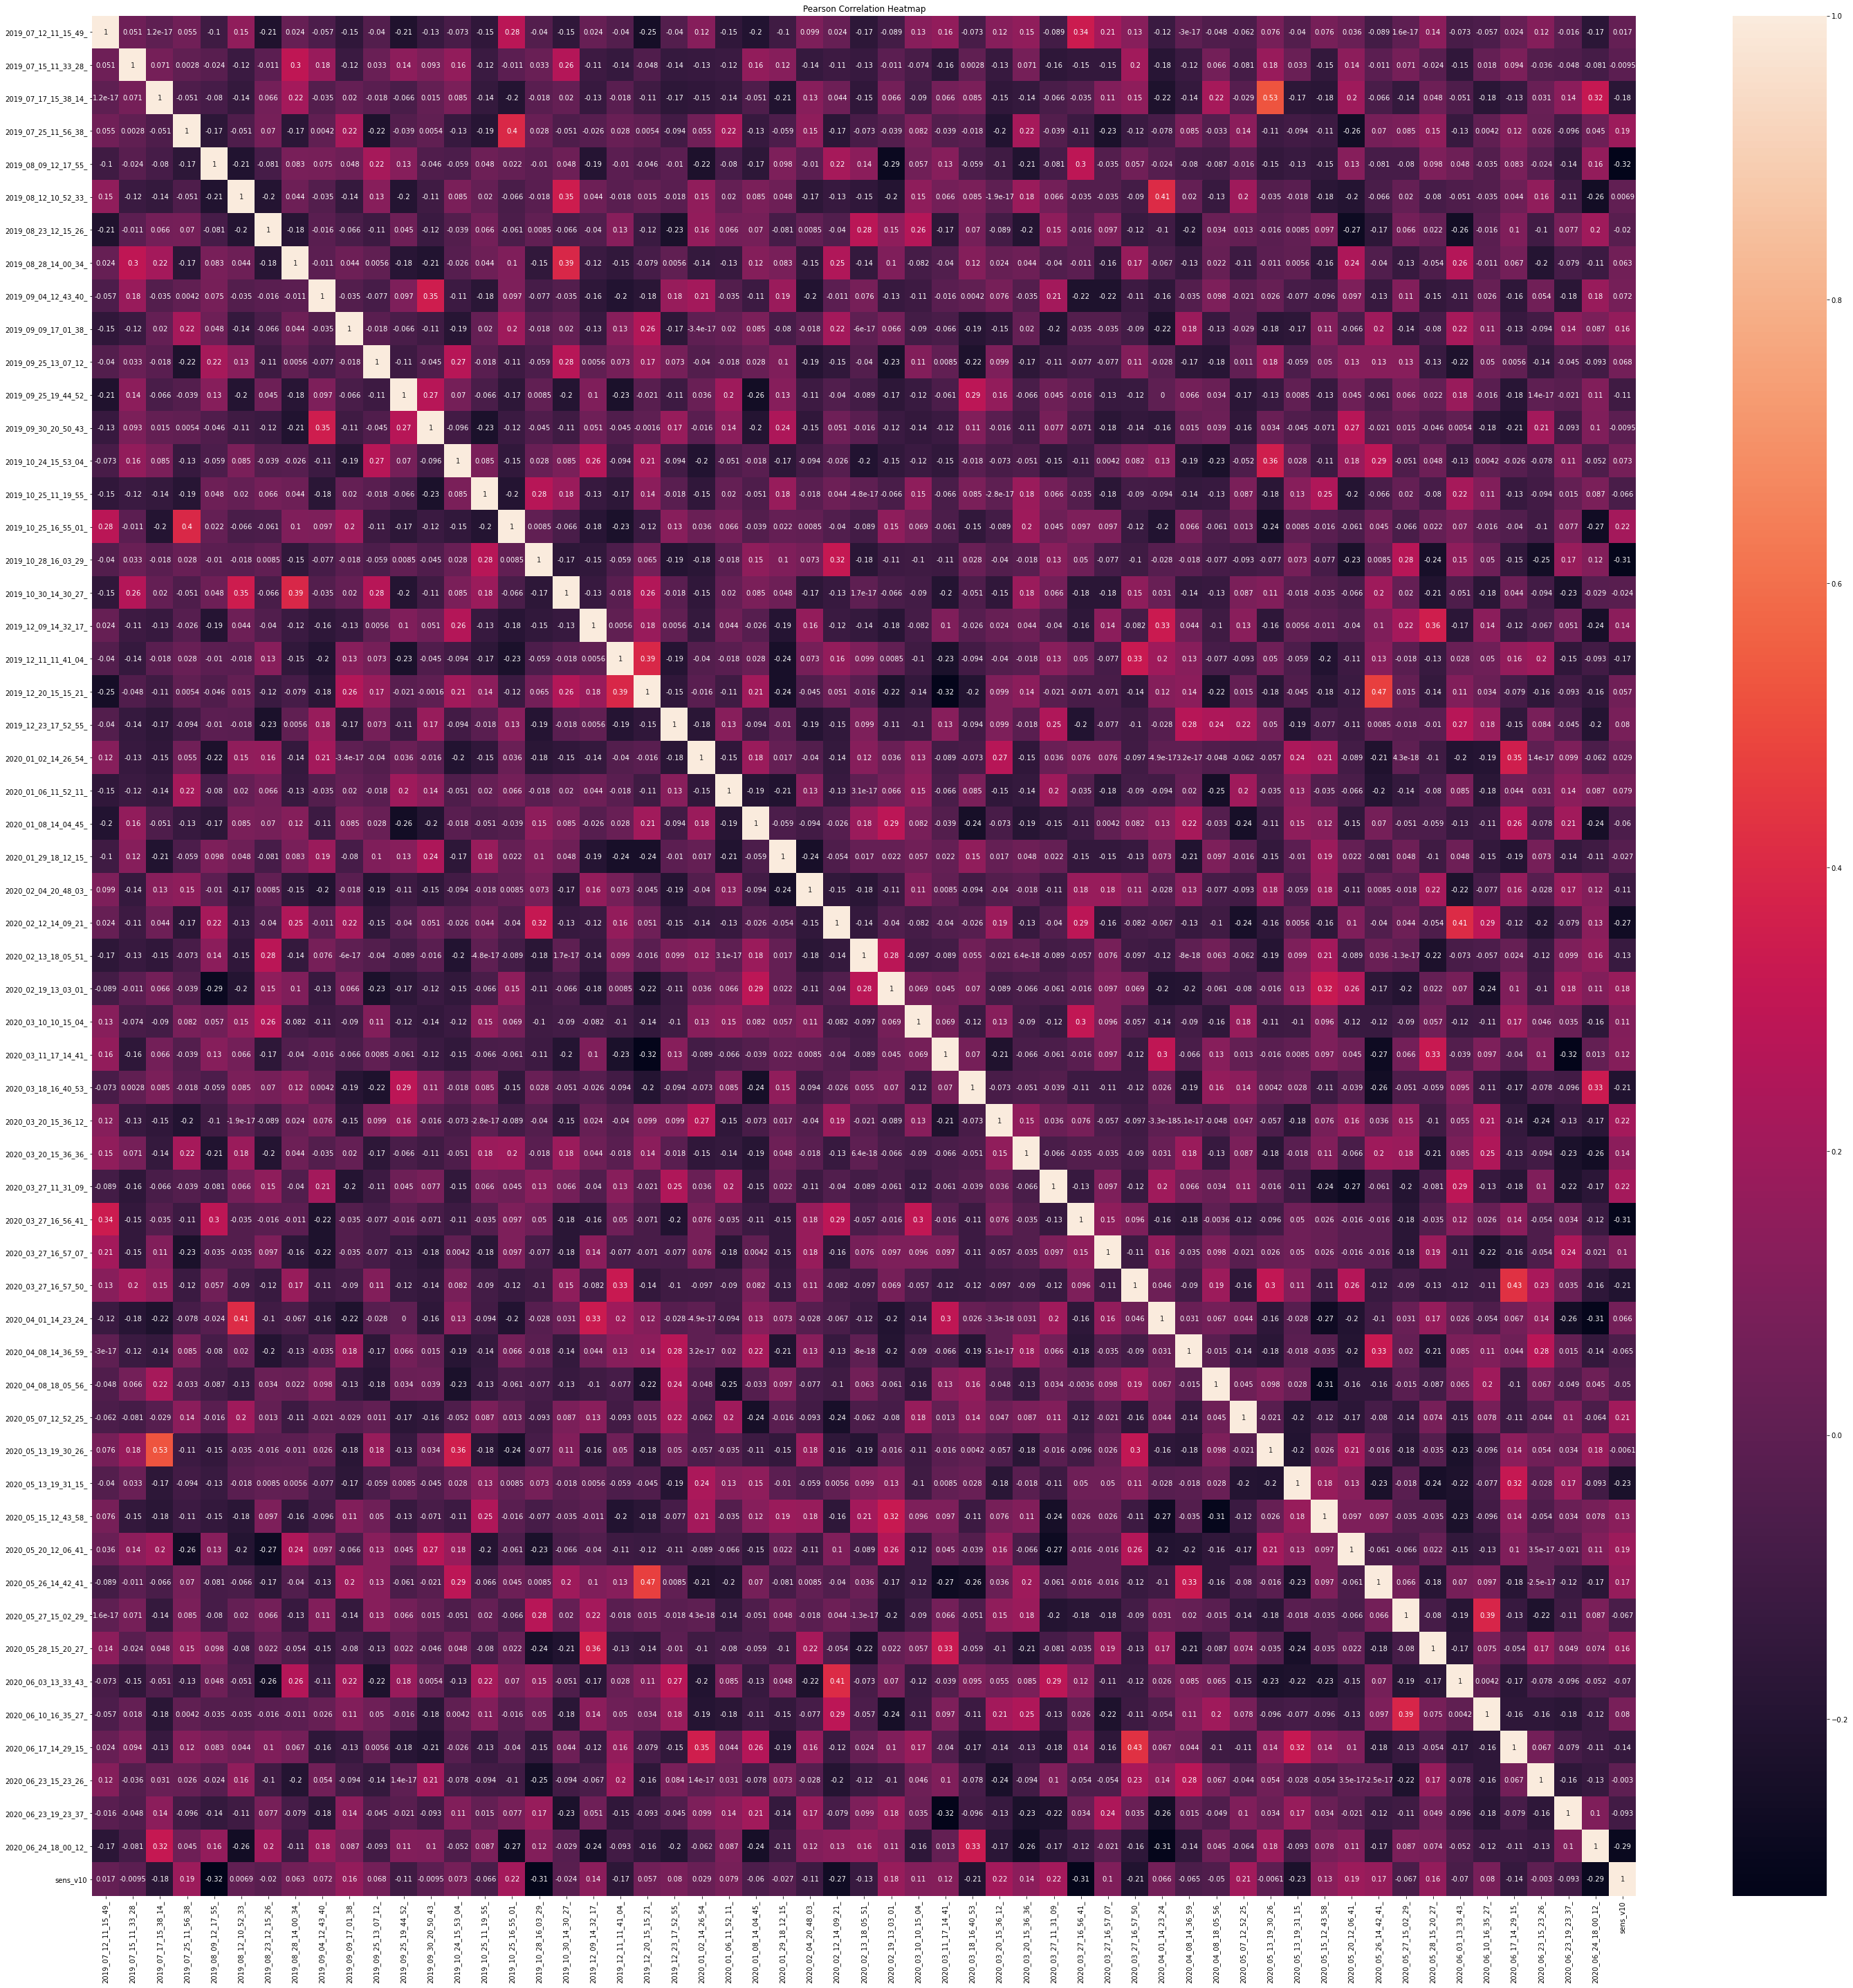

AxesSubplot(0.125,0.125;0.62x0.755)


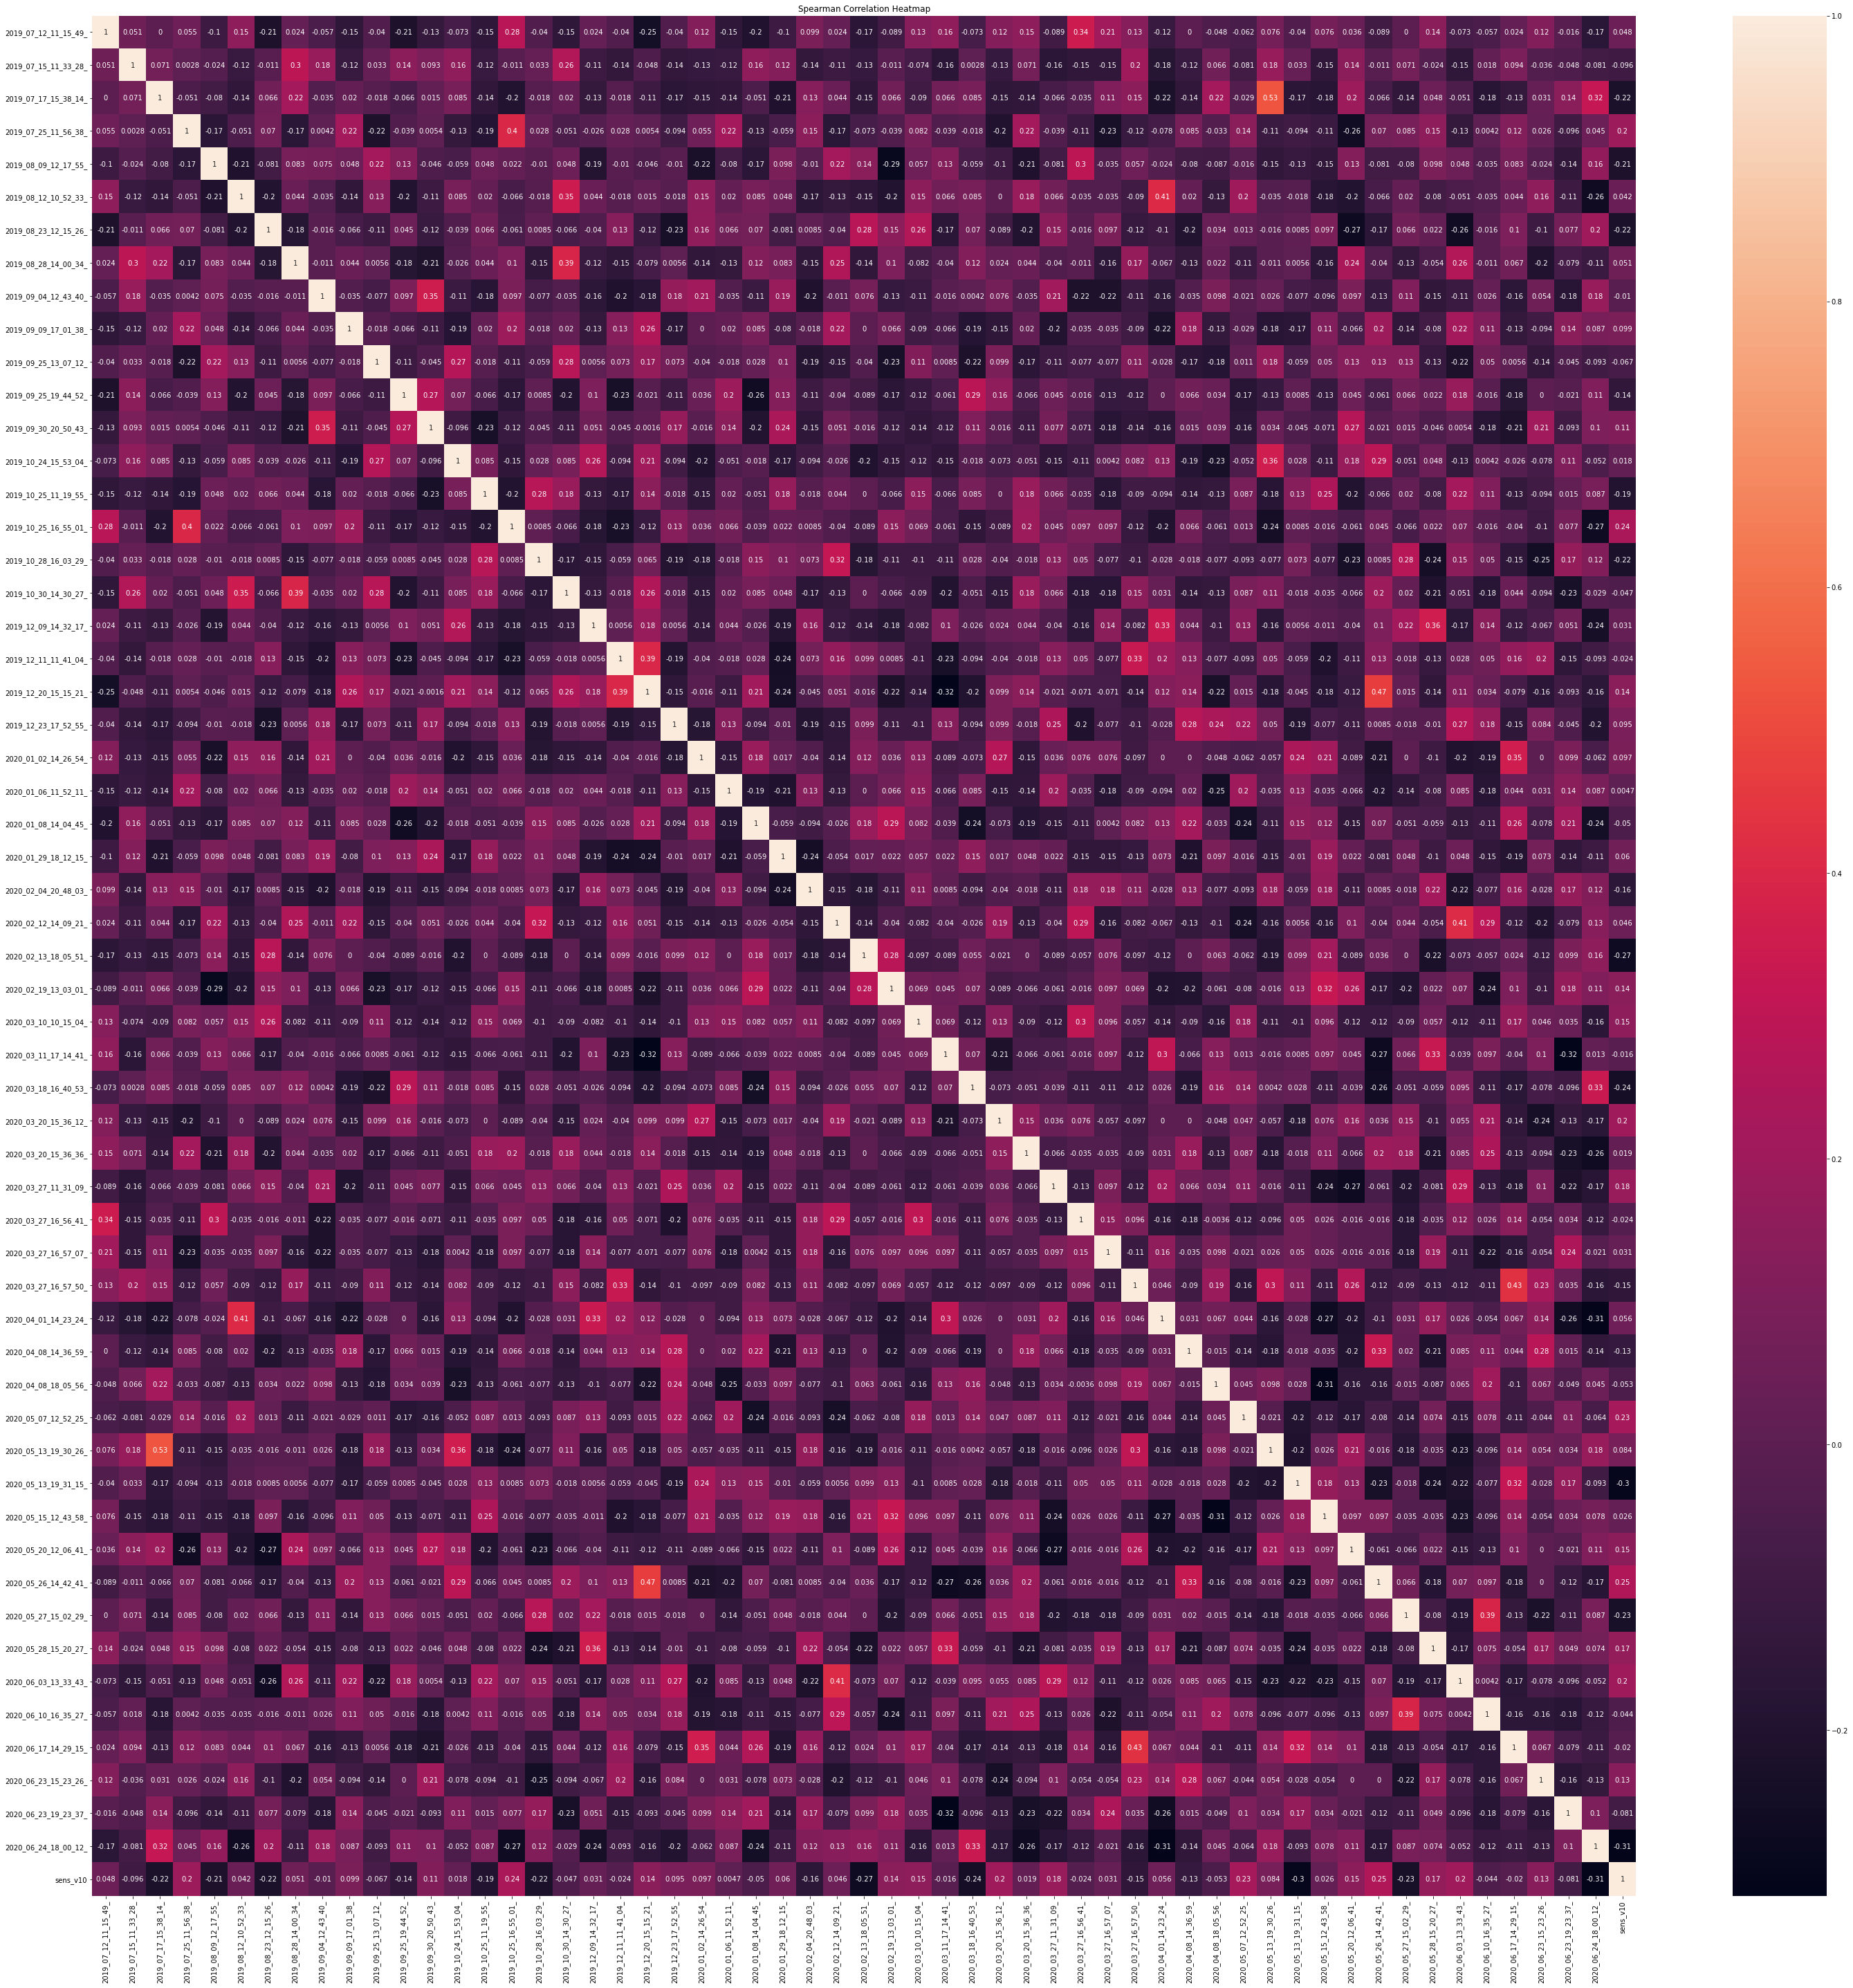

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(columns=list(patients_map.keys()) + ['sens_v10'],
                  data=data)

plt.figure(figsize=(50, 50))
ax = sns.heatmap(df.corr(method="pearson"), annot=True)
plt.xticks(rotation = 90)
plt.title('Pearson Correlation Heatmap')
plt.show()
print(ax)

plt.figure(figsize=(50, 50))
ax = sns.heatmap(df.corr(method="spearman"), annot=True)
plt.xticks(rotation = 90)
plt.title('Spearman Correlation Heatmap')
plt.show()